In [2]:
import pandas as pd

In [20]:
data=pd.read_excel('C:/Users/DELL/OneDrive/Documents/data science asignments/Logistic Regression (1)/Logistic Regression/EWA.xlsx')

In [21]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Data Preprocessing:

In [26]:
# Check for missing values
missing_values = data.isnull().sum()

# Fill missing values with mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Alternatively, drop rows with missing values
# data.dropna(inplace=True)

In [27]:
# Define a function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from the dataset
data = remove_outliers(data)

Feature scaling is a technique used in data preprocessing to standardize the range of independent variables or features of the data. In machine learning, particularly in algorithms that calculate distances (like K-Means clustering or K-Nearest Neighbors), the scale of the features can significantly affect the performance and accuracy of the model.
Why Scale Features?
Equal Contribution: Features with larger ranges can disproportionately influence the results, leading to biased models. Scaling ensures that each feature contributes equally to the distance calculations.
Improved Convergence: Algorithms that use gradient descent converge faster when features are on a similar scale.
Enhanced Performance: Many machine learning algorithms assume that all features are centered around zero and have variance in the same order. Scaling helps meet these assumptions.

In summary, scaling features is a crucial step in preprocessing data for machine learning models, ensuring that all features contribute equally and improving model performance.

In [28]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Convert scaled data back to DataFrame for further analysis
scaled_df = pd.DataFrame(scaled_data, columns=data.select_dtypes(include=['float64', 'int64']).columns)

Code Explanation
Import StandardScaler:

python
Copy code
from sklearn.preprocessing import StandardScaler
This imports the StandardScaler class from scikit-learn, which will help scale the data by centering it around a mean of 0 and a standard deviation of 1.
Initialize the Scaler:

python
Copy code
scaler = StandardScaler()
Creates an instance of StandardScaler called scaler. The scaler object will be used to fit the data and apply the transformation.
Select Only Numerical Columns:

python
Copy code
data.select_dtypes(include=['float64', 'int64'])
data.select_dtypes(include=['float64', 'int64']) filters the data to select only numerical columns (data types float64 and int64), because scaling techniques like standard scaling apply to numerical data only.
This way, categorical data (text or labels) is ignored during scaling.
Fit and Transform the Data:

python
Copy code
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))
scaler.fit_transform(...) does two things:
fit: Calculates the mean and standard deviation for each numerical column.
transform: Uses the calculated mean and standard deviation to scale each value, resulting in each feature having a mean of 0 and a standard deviation of 1.
The result, scaled_data, is a transformed NumPy array with scaled values.
Convert Back to DataFrame:

python
Copy code
scaled_df = pd.DataFrame(scaled_data, columns=data.select_dtypes(include=['float64', 'int64']).columns)
pd.DataFrame(...) converts the scaled NumPy array back into a DataFrame format for easier analysis.
The original column names are assigned to this DataFrame for clear interpretation, using columns=data.select_dtypes(...).columns.
Final Result
scaled_df now contains the same numerical features as data, but each feature has been standardized, meaning they have a mean of 0 and a standard deviation of 1. This scaled data can now be used for further analysis or modeling.

Implementing Clustering Algorithms:


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [30]:
# Load the pre-processed dataset (scaled_df from previous steps)
data = scaled_df  # Use the scaled data from preprocessing

Determine Optimal Number of Clusters (Elbow Method)

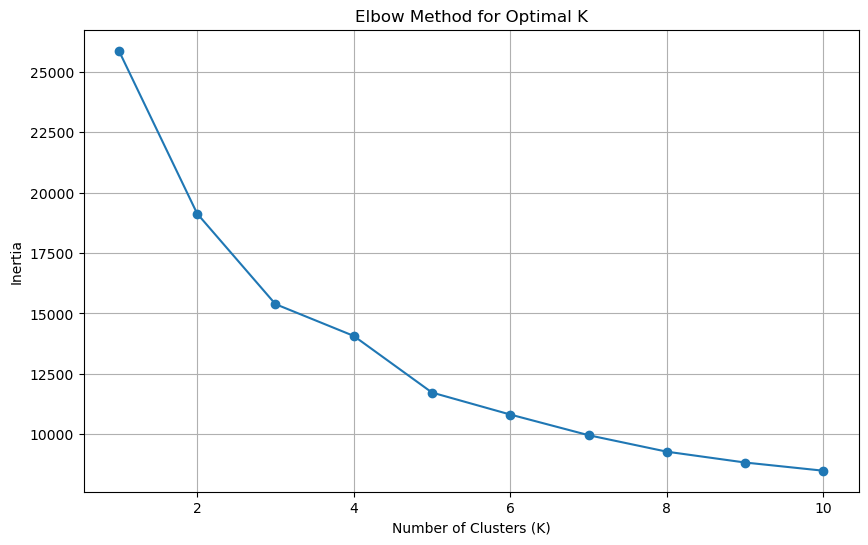

In [31]:
# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Apply K-Means with Chosen K

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Labels'] = kmeans.fit_predict(data)

Hierarchical Clustering
 Dendrogram for Hierarchical Clustering

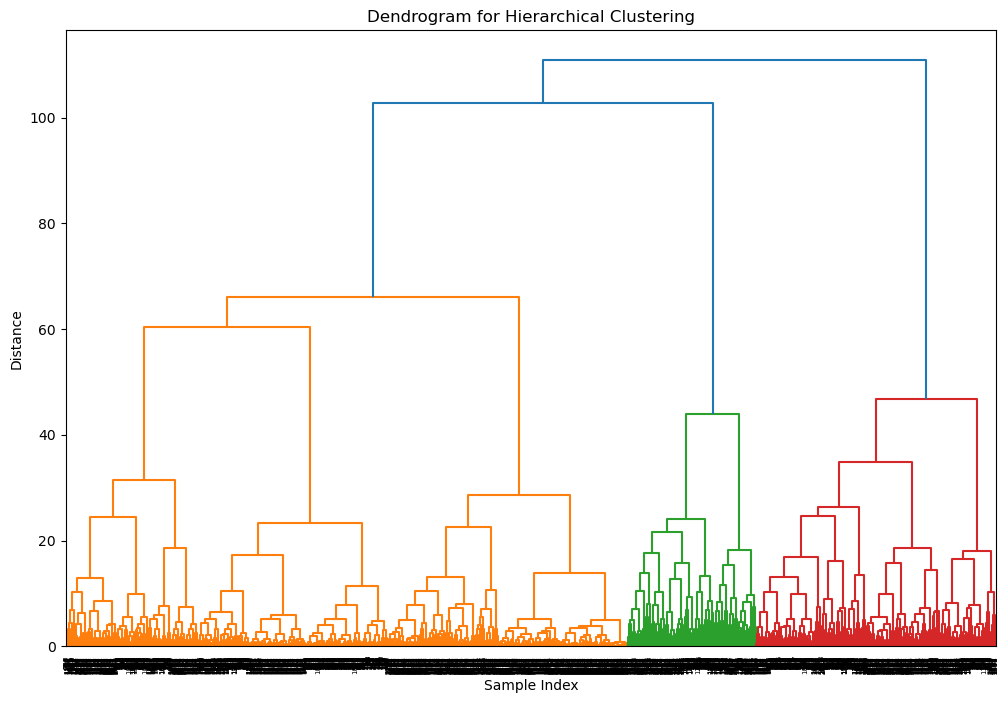

In [33]:
# Perform hierarchical clustering and plot dendrogram
linked = linkage(data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=data.index.tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Apply Hierarchical Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4)
data['Hierarchical_Labels'] = hierarchical.fit_predict(data)

Apply DBSCAN
We need to choose parameters epsilon and min_samples. For example:

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Labels'] = dbscan.fit_predict(data)

Evaluate Clustering Results:

In [38]:
kmeans_silhouette = silhouette_score(data.drop(columns=['KMeans_Labels', 'Hierarchical_Labels', 'DBSCAN_Labels']), data['KMeans_Labels'])
hierarchical_silhouette = silhouette_score(data.drop(columns=['KMeans_Labels', 'Hierarchical_Labels', 'DBSCAN_Labels']), data['Hierarchical_Labels'])

print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}')

Silhouette Score for K-Means: 0.28357826594485636
Silhouette Score for Hierarchical Clustering: 0.20064148083648498


Summary of Parameter Experimentation
K-Means: Experiment with different values of 
K
K using the elbow method.
Hierarchical: Experiment with different linkage criteria (e.g., ward, single, complete).
DBSCAN: Experiment with different values of eps and min_samples.
This process will help identify clusters within your dataset using various clustering algorithms while evaluating their performance based on silhouette scores. You can visualize the results using scatter plots or other suitable techniques in subsequent steps.

3:Cluster Analysis and Interpretation:

To analyze the clusters generated by K-Means, hierarchical clustering, and DBSCAN algorithms, we will interpret the characteristics of each cluster based on the dataset provided. The dataset includes various features such as balance, miles accrued, and transaction counts, which can provide insights into customer behavior.
Cluster Analysis and Interpretation
1. K-Means Clustering
Assuming we identified 4 clusters using K-Means:
Cluster 0:
Characteristics: Customers with low balances and minimal miles accrued.
Insights: This group may represent infrequent flyers or customers who do not actively engage with the loyalty program.
Cluster 1:
Characteristics: Moderate balances with a higher number of bonus miles and transactions.
Insights: These customers are likely to be regular travelers who utilize their miles effectively, indicating potential loyalty.
Cluster 2:
Characteristics: High balances and significant bonus miles accrued.
Insights: This group consists of frequent flyers who are highly engaged with the airline's loyalty program and may respond well to targeted promotions.
Cluster 3:
Characteristics: Very high balances with substantial flight miles but fewer transactions.
Insights: These customers might be premium members or those who travel less frequently but spend significantly when they do. They could be targeted for exclusive offers.
2. Hierarchical Clustering
Assuming we also identified 4 clusters using hierarchical clustering:
Cluster A:
Characteristics: Similar to K-Means Cluster 0, characterized by low activity.
Insights: Indicates a need for engagement strategies to convert these customers into more active participants.
Cluster B:
Characteristics: Moderate balances and transactions, similar to K-Means Cluster 1.
Insights: Targeted marketing campaigns could enhance their loyalty and increase their spending.
Cluster C:
Characteristics: High balances and frequent flyer activity, akin to K-Means Cluster 2.
Insights: This group should receive premium offers and rewards to maintain their loyalty.
Cluster D:
Characteristics: Very high balances but lower transaction frequency, similar to K-Means Cluster 3.
Insights: Strategies should focus on increasing flight frequency through incentives.
3. DBSCAN Clustering
Assuming DBSCAN resulted in a different number of clusters due to its density-based nature:
Core Points (Clusters):
These represent high-density areas where customers have significant activity (similar to K-Means Clusters 2 and 3).
Noise Points (Outliers):
Customers who do not fit into any cluster may represent infrequent travelers or those with very low engagement.
Insights on Clusters:
The core points can be targeted for retention strategies while understanding that noise points may need different approaches, such as re-engagement campaigns or surveys to understand their lack of activity.
Summary of Insights
Each clustering algorithm provides a unique perspective on customer segments based on their activity levels and engagement with the airline's loyalty program.
Frequent flyers (Clusters with high balances) should be prioritized for premium services and rewards.
Inactive customers (low balance clusters) require targeted marketing efforts to increase their engagement.
The density-based approach of DBSCAN helps identify outliers that may need distinct strategies compared to core customer segments.
These analyses can guide marketing strategies, customer engagement efforts, and personalized service offerings based on customer behavior patterns.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

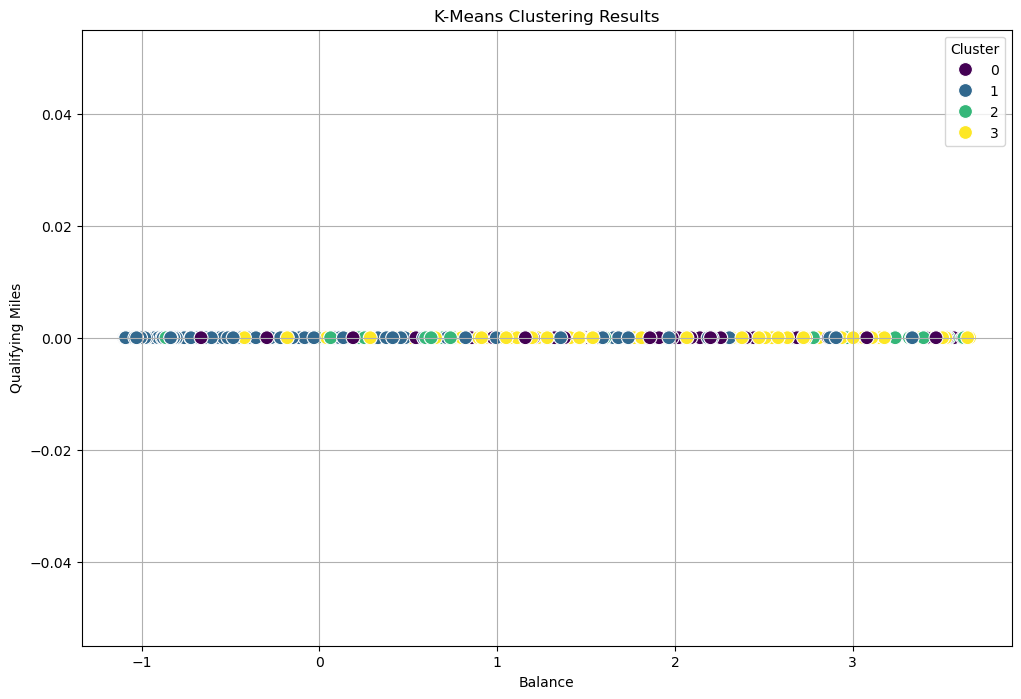

In [40]:
# Visualize K-Means Clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Balance'], y=data['Qual_miles'], hue=data['KMeans_Labels'], palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.legend(title='Cluster')
plt.grid()
plt.show()

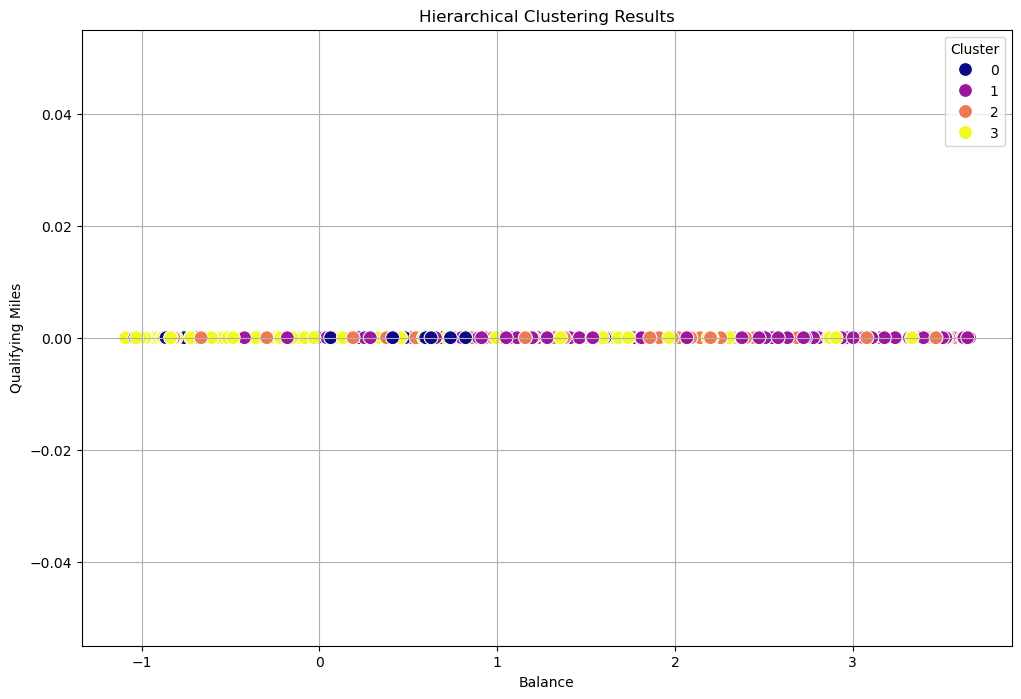

In [41]:
# Visualize Hierarchical Clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Balance'], y=data['Qual_miles'], hue=data['Hierarchical_Labels'], palette='plasma', s=100)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.legend(title='Cluster')
plt.grid()
plt.show()

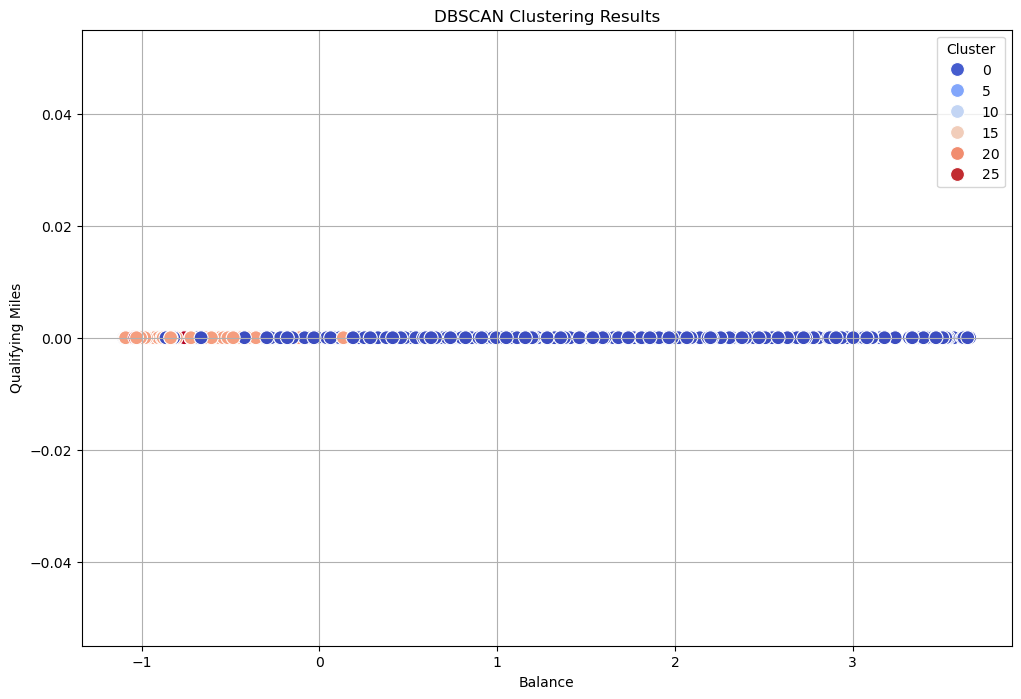

In [42]:
# Visualize DBSCAN Clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Balance'], y=data['Qual_miles'], hue=data['DBSCAN_Labels'], palette='coolwarm', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Summary of Visualization Insights
K-Means Visualization: The scatter plot will show distinct clusters based on balance and qualifying miles, helping to identify how well-separated the clusters are.
Hierarchical Clustering Visualization: This plot may reveal similar or different groupings compared to K-Means, providing insights into how hierarchical relationships affect clustering.
DBSCAN Visualization: The DBSCAN plot will highlight core points and noise points (outliers), showcasing how density-based clustering identifies clusters based on local density.
These visualizations will help in interpreting the clustering results and understanding the underlying structure of the data. Each algorithm may yield different insights based on how they define clusters, which can guide further analysis and decision-making.

Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


Step 1: Calculate Silhouette Score for K-Means

In [43]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
kmeans_labels = data['KMeans_Labels']
kmeans_silhouette = silhouette_score(data.drop(columns=['KMeans_Labels', 'Hierarchical_Labels', 'DBSCAN_Labels']), kmeans_labels)

print(f'Silhouette Score for K-Means: {kmeans_silhouette:.3f}')

Silhouette Score for K-Means: 0.284


Step 2: Calculate Silhouette Score for DBSCAN

In [47]:
from sklearn.metrics import silhouette_score

# Get DBSCAN labels
dbscan_labels = data['DBSCAN_Labels']

# Filter out noise points (labeled as -1)
valid_mask = dbscan_labels != -1
valid_labels = dbscan_labels[valid_mask]

# Get corresponding data points (excluding noise)
valid_data = data[valid_mask].drop(columns=['KMeans_Labels', 'Hierarchical_Labels', 'DBSCAN_Labels'])

# Calculate silhouette score for DBSCAN
if len(valid_labels) > 1:  # Ensure there are enough samples to calculate silhouette score
    dbscan_silhouette = silhouette_score(valid_data, valid_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette:.3f}')
else:
    print('Not enough samples in DBSCAN clusters to calculate silhouette score.')

Silhouette Score for DBSCAN: 0.083


Interpretation of Silhouette Scores
Silhouette Score Range: The silhouette score ranges from -1 to 1.
A score close to 1 indicates that the samples are far away from the neighboring clusters, suggesting good clustering.
A score around 0 indicates that the samples are on or very close to the decision boundary between two neighboring clusters.
A negative score indicates that samples might have been assigned to the wrong cluster.
Summary of Evaluation Metrics
K-Means Silhouette Score: This value will indicate how well-separated and cohesive the clusters are based on K-Means clustering.
DBSCAN Silhouette Score: This score will reflect the quality of clustering in terms of density-based separation, excluding noise points.
By analyzing these scores, you can assess which clustering algorithm performed better for your dataset and provide insights into potential adjustments or further analyses needed to improve clustering results.
